## Handling Null Values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv('../data/datasets/Bondora_preprocessed.csv', low_memory=False)
df.head()

BidsPortfolioManager  BidsApi  BidsManual NewCreditCustomer  \
0                   970     1150         5.0      Old_customer   
1                  1295        0      1705.0      Old_customer   
2                  2700      565      5835.0      New_customer   
3                  1115        0       385.0      New_customer   
4                   305        0       785.0      New_customer   

           VerificationType LanguageCode  Age  Gender Country  AppliedAmount  \
0  Income_expenses_verified     Estonian   53  Female      EE         2125.0   
1         Income_unverified     Estonian   50  Female      EE         3000.0   
2  Income_expenses_verified     Estonian   44    Male      EE        10630.0   
3           Income_verified      Spanish   42    Male      ES         1500.0   
4  Income_expenses_verified      Spanish   34  Female      ES         1595.0   

   ...  PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
0  ...                 969.16                         1187.91   
1  ...                 563.59                          360.07   
2  ...                6537.00                         1708.47   
3  ...                 464.73                          355.92   
4  ...                   0.01                            0.00   

   PrincipalBalance  InterestAndPenaltyBalance NoOfPreviousLoansBeforeLoan  \
0           1155.84                     433.60                         1.0   
1           2436.41                    2291.82                         1.0   
2              0.00                       0.00                         0.0   
3           1035.27                    2833.83                         0.0   
4           1089.99                    4215.37                         0.0   

  AmountOfPreviousLoansBeforeLoan PreviousRepaymentsBeforeLoan  \
0                           500.0                       590.95   
1                          1800.0                       445.26   
2                             0.0                         0.00   
3                             0.0                         0.00   
4                             0.0                         0.00   

  PreviousEarlyRepaymentsCountBeforeLoan NrOfScheduledPayments      Defaulted  
0                                    0.0                   NaN      Defaulted  
1                                    1.0                   NaN      Defaulted  
2                                    0.0                   NaN  Not Defaulted  
3                                    1.0                   NaN      Defaulted  
4                                    0.0                   NaN      Defaulted  

[5 rows x 51 columns]

In [3]:
categorical = df.select_dtypes("object")
categorical.isnull().sum()

NewCreditCustomer                        0
VerificationType                        50
LanguageCode                             0
Gender                                  45
Country                                  0
UseOfLoan                                0
Education                               50
MaritalStatus                           50
EmploymentStatus                       202
EmploymentDurationCurrentEmployer     1026
OccupationArea                          91
HomeOwnershipType                     1657
Rating                                2732
Restructured                             0
WorseLateCategory                    23189
CreditScoreEsMicroL                  28161
Defaulted                                0
dtype: int64

All the null values for categorical variables would be renamed as "Unknown"

In [4]:
categorical = categorical.fillna("Unknown")
categorical.isnull().sum()

NewCreditCustomer                    0
VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
UseOfLoan                            0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
Rating                               0
Restructured                         0
WorseLateCategory                    0
CreditScoreEsMicroL                  0
Defaulted                            0
dtype: int64

In [5]:
df = df.drop(categorical, axis=1)
df.isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
Age                                           0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6660
IncomeTotal                                   0
ExistingLiabilities                           0
LiabilitiesTotal                              0
RefinanceLiabilities                          0
DebtToIncome                                 50
FreeCash                                     50
MonthlyPaymentDay                             0
ActiveScheduleFirstPaymentReached             0
PlannedInterestTillDate                       0
ExpectedLoss                               2638
LossGivenDefault                           2638
ExpectedReturn                          

In [6]:
df = df.fillna(df.mean())
df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
Age                                       0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities                      0
DebtToIncome                              0
FreeCash                                  0
MonthlyPaymentDay                         0
ActiveScheduleFirstPaymentReached         0
PlannedInterestTillDate                   0
ExpectedLoss                              0
LossGivenDefault                          0
ExpectedReturn                            0
ProbabilityOfDefault                      0
PrincipalOverdueBySchedule      

Now, we will encode categorical variables via Label Encoder method

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical.columns:
    categorical[col] = label_encoder.fit_transform(categorical[col])

categorical.head()

NewCreditCustomer  VerificationType  LanguageCode  Gender  Country  \
0                  1                 0             1       0        0   
1                  1                 1             1       0        0   
2                  0                 0             1       1        0   
3                  0                 3             6       1        1   
4                  0                 0             6       0        1   

   UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0          7          3              0                 3   
1          3          1              0                 0   
2          3          3              1                 0   
3          7          0              2                 1   
4          9          3              1                 3   

   EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                                  0              12                  7   
1                                  0              16                  7   
2                                  7              17                  5   
3                                  9              12                  4   
4                                  5              12                  9   

   Rating  Restructured  WorseLateCategory  CreditScoreEsMicroL  Defaulted  
0       3             0                  4                   11          0  
1       2             0                  4                   11          0  
2       0             0                  4                   11          1  
3       6             0                  4                    4          0  
4       7             0                  4                    6          0

In [8]:
df = df.join(categorical)
df.shape

(121461, 51)

In the preprocessing stage of the dataset we have indicated "Defaulted" feature to be a target variable. In order to identify features that are most relevant to a target variable, and reduce the dimension of the dataset we will use Mutual Information.  (add why MI)

In [9]:
from sklearn.feature_selection import mutual_info_classif

X = df.copy()
y = X.pop("Defaulted")

disc_feat = X.dtypes == int

MI_ranking = mutual_info_classif(X, y, discrete_features=disc_feat)
MI_ranking = pd.Series(MI_ranking, name = "Mutual Info Ranking", index=X.columns)
MI_ranking = MI_ranking.sort_values(ascending=False)

MI_ranking

InterestAndPenaltyBalance                 0.605525
PrincipalBalance                          0.497460
WorseLateCategory                         0.423289
PrincipalOverdueBySchedule                0.403199
PrincipalPaymentsMade                     0.378041
RecoveryStage                             0.260825
NrOfScheduledPayments                     0.216865
PlannedInterestTillDate                   0.121135
ProbabilityOfDefault                      0.107468
ExpectedLoss                              0.091704
ExpectedReturn                            0.082228
LossGivenDefault                          0.071455
MonthlyPayment                            0.068788
Interest                                  0.059352
InterestAndPenaltyPaymentsMade            0.045000
LanguageCode                              0.039945
Country                                   0.039473
LoanDuration                              0.038365
Rating                                    0.038247
AppliedAmount                  

First 15 features with the highest MI Score will be selected to proceed with the ML models.

Text(0, 0.5, 'Features')

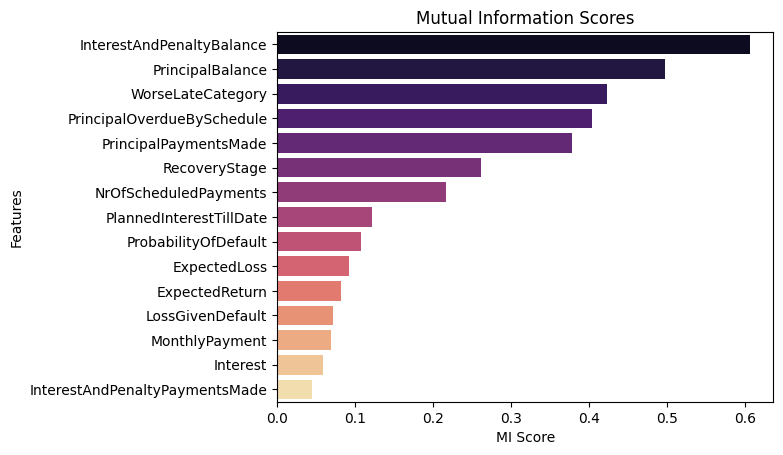

In [10]:
# sns.barplot(x=MI_ranking.values[:15], y=MI_ranking.index[:15], orient='h', palette="magma")
sns.barplot(x=MI_ranking.values[:15], y=MI_ranking.index[:15], orient='h', palette="magma")
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Features')

In [11]:
MI_selected = ['InterestAndPenaltyBalance',
 'PrincipalBalance',
 'WorseLateCategory',
 'PrincipalOverdueBySchedule',
 'PrincipalPaymentsMade',
 'RecoveryStage',
 'NrOfScheduledPayments',
 'PlannedInterestTillDate',
 'ProbabilityOfDefault',
 'ExpectedLoss',
 'ExpectedReturn',
 'LossGivenDefault',
 'MonthlyPayment',
 'Interest',
 'InterestAndPenaltyPaymentsMade']

<Axes: >

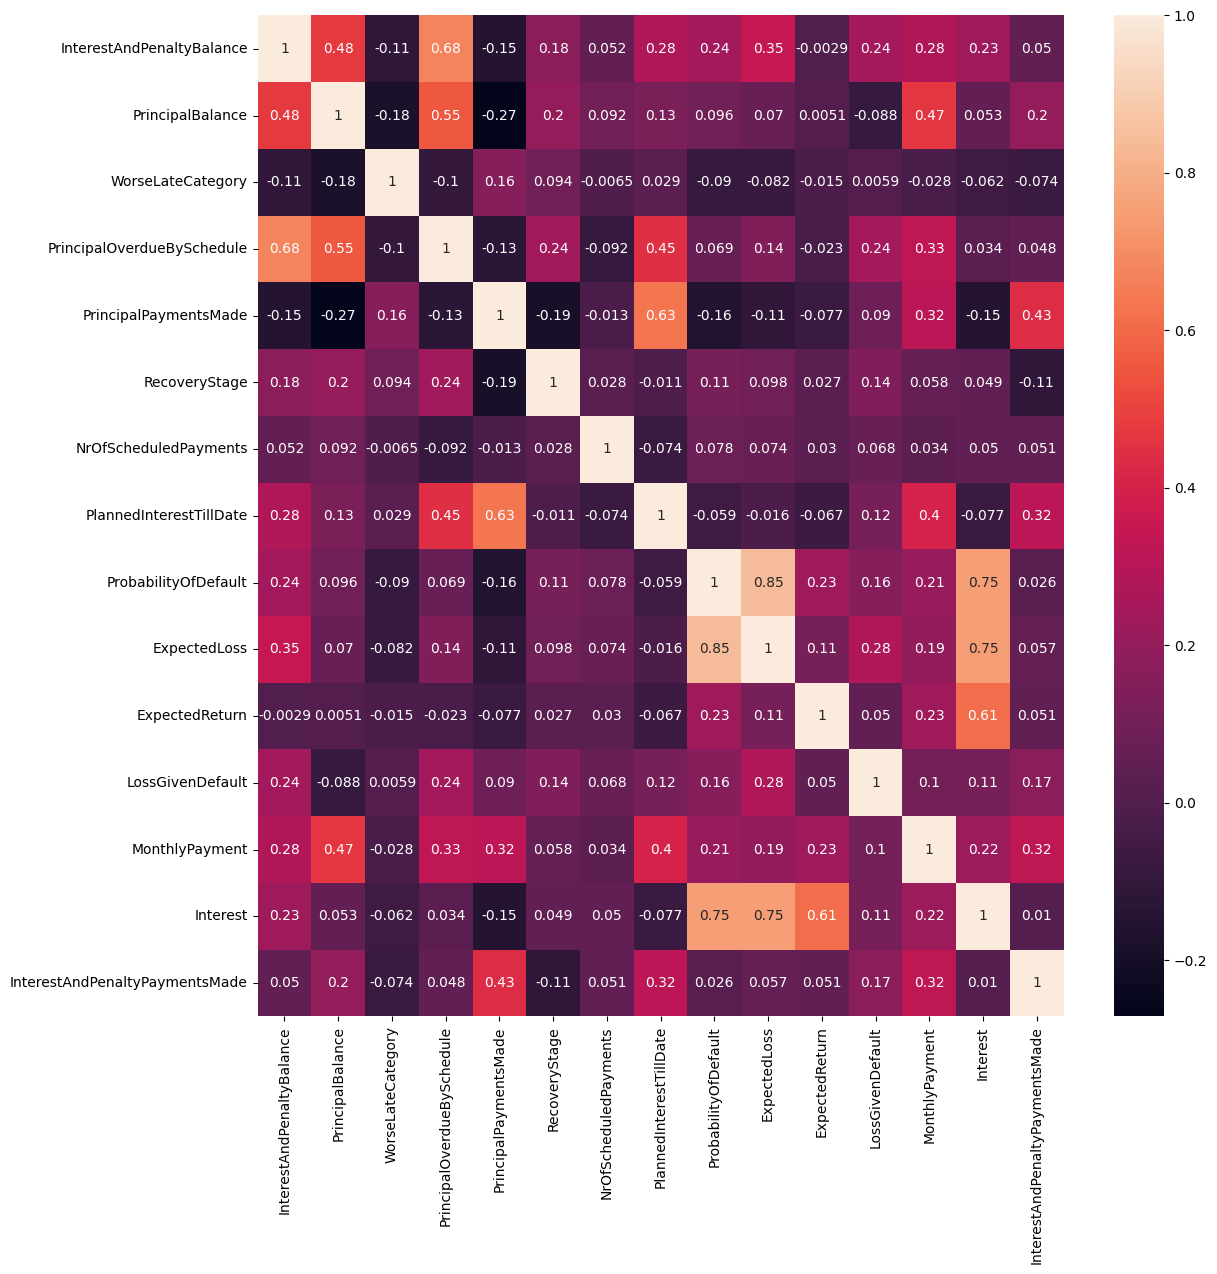

In [12]:
plt.figure(figsize=(13,13))
sns.heatmap(df[MI_selected].corr(), annot=True)

In [13]:
df[MI_selected].shape

(121461, 15)

## Modelling and Prediction

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score

from codecarbon import EmissionsTracker
import psutil
import GPUtil


import shap
from lime import lime_tabular


In [15]:
def get_cpu():
    return psutil.cpu_percent(interval=1)

def get_gpu():
    gpus = GPUtil.getGPUs()
    print("GPU:", gpus)
    if len(gpus) > 0:
        return sum(gpu.load for gpu in gpus) / len(gpus) * 100
    else:
        return 0


def get_ram():
    memory = psutil.virtual_memory()
    return memory.used / (1024**3)

In [16]:
df["Defaulted"] = label_encoder.fit_transform(df["Defaulted"])
X = df[MI_selected]
y = df["Defaulted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

skf = StratifiedKFold(n_splits=5)


In [17]:
def emissions_analysis(tracker, name):
    print("Evaluating Sustainability: ")
    emission = tracker.final_emissions
    energy = tracker._total_energy.kWh
    cpu_use = tracker._total_cpu_energy.kWh
    gpu_use = get_gpu()
    ram_use = tracker._total_ram_energy.kWh

    emission = tracker.final_emissions
    energy = tracker._total_energy.kWh
    
    return {"Model" : name, "Energy consumption (kWh)" : energy, 
                     "Carbon Emissions (kg CO2)" : emission,
                     "CPU usage (kWh)" : cpu_use, 
                     "GPU usage (%)" : gpu_use, 
                     "Memory usage (kWh)" : ram_use}

def accuracy_analysis(y_predict, y_predict_probability, name):
    print("Evaluating Accuracy: ")
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict_probability)

    return {"Model" : name, 
                     "Precision" : precision, 
                     "Recall" : recall, 
                     "AUC" : auc,
                     "Confusion matrix" : confusion_matrix(y_test, y_predict)}


In [18]:
def analyze(model, name):
    tracker = EmissionsTracker()
    tracker.start()
    model.fit(X_train, y_train)
    tracker.stop()    

    y_predict = model.predict(X_test)
    y_predict_probability = model.predict_proba(X_test)[:, 1]
    
    accuracy_dict = accuracy_analysis(y_predict, y_predict_probability, name)
    
    emission_dict = emissions_analysis(tracker=tracker, name=name)

    return accuracy_dict, emission_dict, y_predict, y_predict_probability
        

### Decision Tree

In [19]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_model.fit(X = X_train, y =  y_train)

param_grid = {'max_depth': range(1, 11)}


In [20]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f'Best max_depth: {best_max_depth}')
print(f'Best cross-validation score: {best_score}')

Best max_depth: 8
Best cross-validation score: 0.9970257717053392


In [21]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth, random_state=42)
acc_dt, green_dt, y_predict_dt, y_predict_proba_dt = analyze(dt_model, "Decision Tree")

[codecarbon WARNING @ 21:44:05] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 21:44:05] [setup] RAM Tracking...
[codecarbon INFO @ 21:44:05] [setup] GPU Tracking...
[codecarbon INFO @ 21:44:05] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:44:05] [setup] CPU Tracking...
[codecarbon WARNING @ 21:44:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:44:07] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 21:44:07] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 21:44:07] >>> Tracker's metadata:
[codecarbon INFO @ 21:44:07]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 21:44:07]   Python version: 3.12.4
[codecarbon INFO @ 21:44:07]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 21:44:07]   Available RAM : 31.680 GB
[codecarbon INFO @ 21:44:07]   CPU count: 20
[codecarbon IN

Evaluating Accuracy: 
Evaluating Sustainability: 
GPU: [<GPUtil.GPUtil.GPU object at 0x00000236ECBD8B60>]


### Random Forest

In [22]:
rf_model = RandomForestClassifier(random_state=42)
acc_rf, green_rf, y_predict_rf, y_predict_proba_rf = analyze(rf_model, "Random Forest")

[codecarbon WARNING @ 21:44:11] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 21:44:11] [setup] RAM Tracking...
[codecarbon INFO @ 21:44:11] [setup] GPU Tracking...
[codecarbon INFO @ 21:44:11] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:44:11] [setup] CPU Tracking...
[codecarbon WARNING @ 21:44:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:44:12] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 21:44:12] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 21:44:12] >>> Tracker's metadata:
[codecarbon INFO @ 21:44:12]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 21:44:12]   Python version: 3.12.4
[codecarbon INFO @ 21:44:12]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 21:44:12]   Available RAM : 31.680 GB
[codecarbon INFO @ 21:44:12]   CPU count: 20
[codecarbon IN

Evaluating Accuracy: 
Evaluating Sustainability: 
GPU: [<GPUtil.GPUtil.GPU object at 0x00000236EF41ADE0>]


### Logistic Regression

In [23]:
lr_model = LogisticRegression()
acc_lr, green_lr, y_predict_lr, y_predict_proba_lr = analyze(lr_model, "Logistic Regression")

[codecarbon WARNING @ 21:44:24] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 21:44:24] [setup] RAM Tracking...
[codecarbon INFO @ 21:44:24] [setup] GPU Tracking...
[codecarbon INFO @ 21:44:24] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:44:24] [setup] CPU Tracking...
[codecarbon WARNING @ 21:44:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:44:25] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 21:44:25] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 21:44:25] >>> Tracker's metadata:
[codecarbon INFO @ 21:44:25]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 21:44:25]   Python version: 3.12.4
[codecarbon INFO @ 21:44:25]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 21:44:25]   Available RAM : 31.680 GB
[codecarbon INFO @ 21:44:25]   CPU count: 20
[codecarbon IN

Evaluating Accuracy: 
Evaluating Sustainability: 
GPU: [<GPUtil.GPUtil.GPU object at 0x00000236EF49AC00>]


### XGBoost

In [24]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
acc_xgb, green_xgb, y_predict_xgb, y_predict_proba_xgb = analyze(xgb_model, "XGBoost")

[codecarbon WARNING @ 21:44:28] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 21:44:28] [setup] RAM Tracking...
[codecarbon INFO @ 21:44:28] [setup] GPU Tracking...
[codecarbon INFO @ 21:44:28] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:44:28] [setup] CPU Tracking...
[codecarbon WARNING @ 21:44:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 21:44:30] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 21:44:30] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 21:44:30] >>> Tracker's metadata:
[codecarbon INFO @ 21:44:30]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 21:44:30]   Python version: 3.12.4
[codecarbon INFO @ 21:44:30]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 21:44:30]   Available RAM : 31.680 GB
[codecarbon INFO @ 21:44:30]   CPU count: 20
[codecarbon IN

Evaluating Accuracy: 
Evaluating Sustainability: 
GPU: [<GPUtil.GPUtil.GPU object at 0x00000236EF498F80>]


## Sustainability Report

In [25]:
acc_total = pd.DataFrame([acc_dt, acc_rf, acc_lr, acc_xgb])
print(acc_total)

                 Model  Precision    Recall       AUC  \
0        Decision Tree   0.995138  0.998925  0.999154   
1        Random Forest   0.995879  0.999586  0.999812   
2  Logistic Regression   0.960186  0.973530  0.991722   
3              XGBoost   0.996618  0.999338  0.999917   

               Confusion matrix  
0    [[12145, 59], [13, 12076]]  
1     [[12154, 50], [5, 12084]]  
2  [[11716, 488], [320, 11769]]  
3     [[12163, 41], [8, 12081]]  


In [26]:
green_total = pd.DataFrame([green_dt, green_rf, green_lr, green_xgb])
print(green_total)

                 Model  Energy consumption (kWh)  Carbon Emissions (kg CO2)  \
0        Decision Tree                  0.000011                   0.000004   
1        Random Forest                  0.000133                   0.000047   
2  Logistic Regression                  0.000005                   0.000002   
3              XGBoost                  0.000007                   0.000002   

   CPU usage (kWh)  GPU usage (%)  Memory usage (kWh)  
0     5.151277e-06            0.0        1.406940e-06  
1     9.682614e-05            0.0        2.703294e-05  
2     9.503431e-07            0.0        2.326490e-07  
3     2.778442e-06            0.0        7.304482e-07  


## Transparency Evaluation

## SCHAP Values

### Decision Tree

In [27]:
explainer_dt = shap.TreeExplainer(dt_model, X_train)
shap_values_dt = explainer_dt(X_test)

np.shape(shap_values_dt.values)

(24293, 15, 2)

In [28]:
dt_model.predict_proba(X_test)[0]

array([1., 0.])

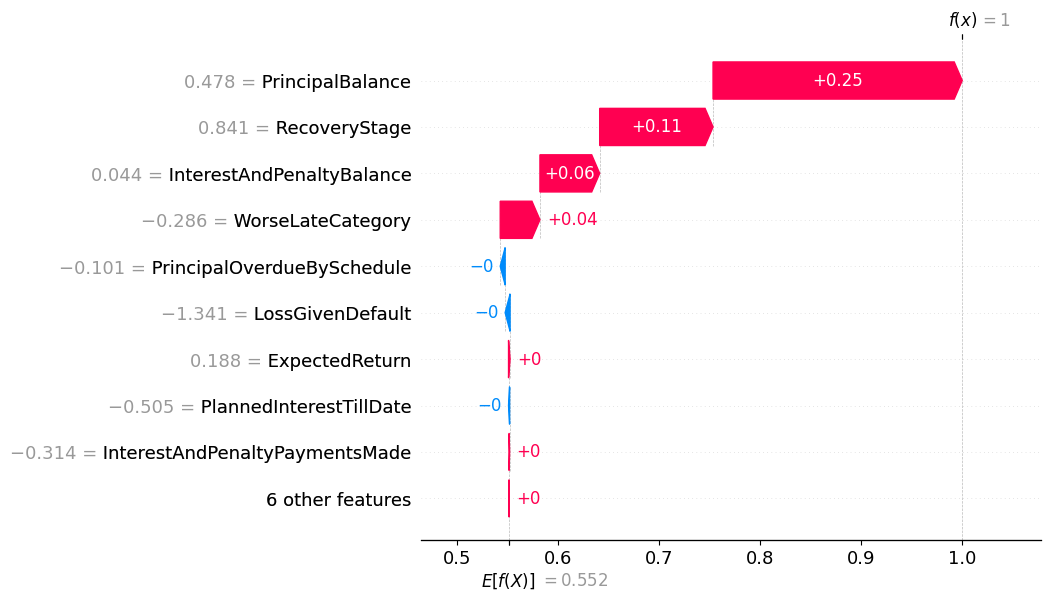

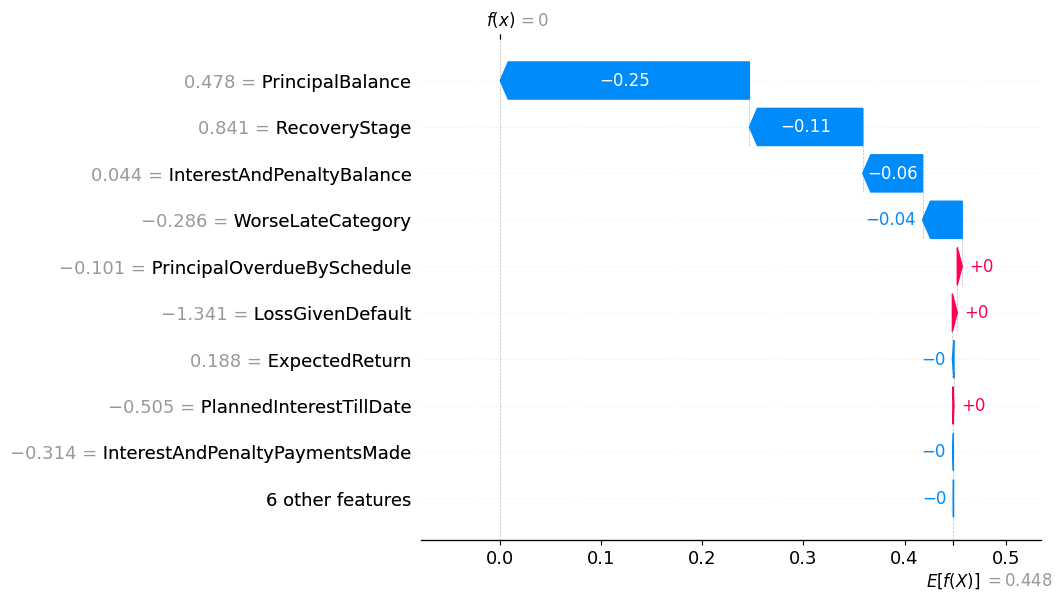

In [29]:
shap.plots.waterfall(shap_values_dt[0, : , 0])
shap.plots.waterfall(shap_values_dt[0, : , 1])

In [30]:
new_schap_values_dt = []
for i, prediction in enumerate(y_predict_dt):
    new_schap_values_dt.append(shap_values_dt.values[i][:,prediction])

shap_values_dt.values = np.array(new_schap_values_dt)
print(shap_values_dt.shape)

(24293, 15)


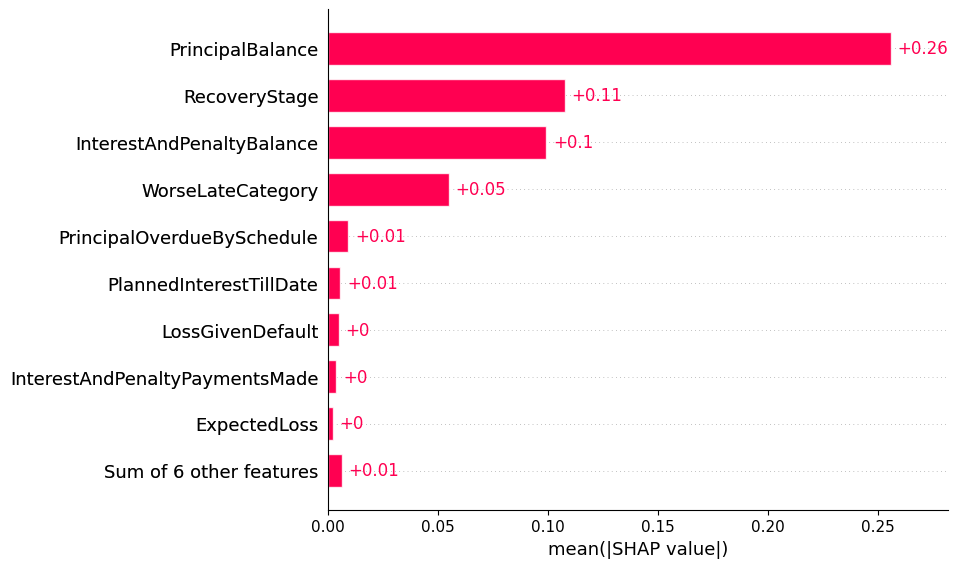

In [31]:
shap.plots.bar(shap_values_dt)

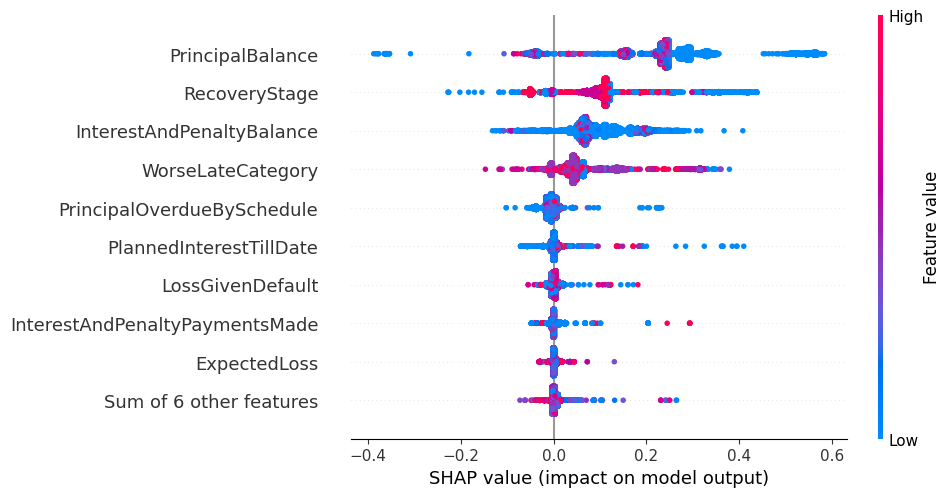

In [32]:
shap.plots.beeswarm(shap_values_dt)

### Logistic Regression

In [33]:
explainer_lr = shap.LinearExplainer(lr_model, X_train)
shap_values_lr = explainer_lr(X_test)

In [34]:
np.shape(shap_values_lr.values)

(24293, 15)

In [35]:
import math
print(y_predict_lr[:5])
probabilities = y_predict_proba_lr[:5]
print(probabilities)
log_odds = []
for prob in probabilities:
    log_odd = math.log(prob/(1-prob))
    log_odds.append(log_odd)
print(log_odds)
print()


[0 1 1 1 0]
[1.31741468e-05 9.99926038e-01 6.67145633e-01 9.85029334e-01
 9.76700464e-06]
[-11.237241051619382, 9.511883696890047, 0.6953033024241607, 4.1865787672579495, -11.536490959105627]



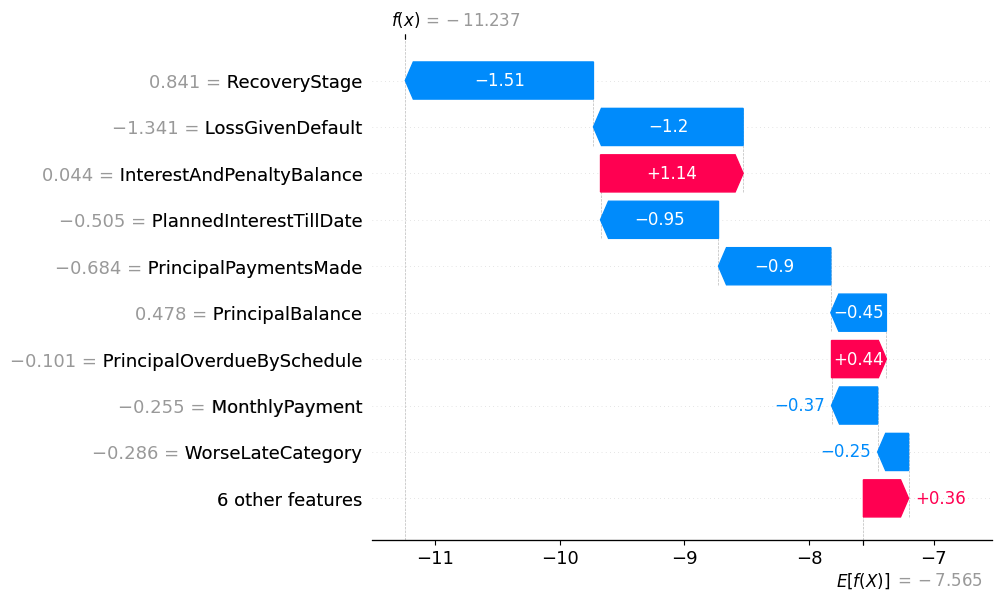

In [36]:
shap.plots.waterfall(shap_values_lr[0])

In [37]:
shap.plots.force(shap_values_lr[0])

In [38]:
shap.plots.force(shap_values_lr[:10])

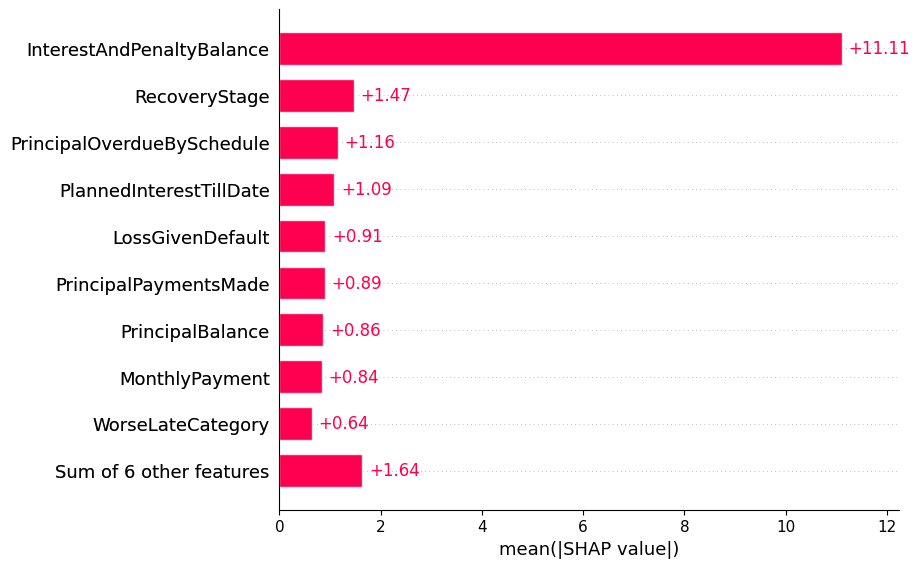

In [39]:
shap.plots.bar(shap_values_lr)

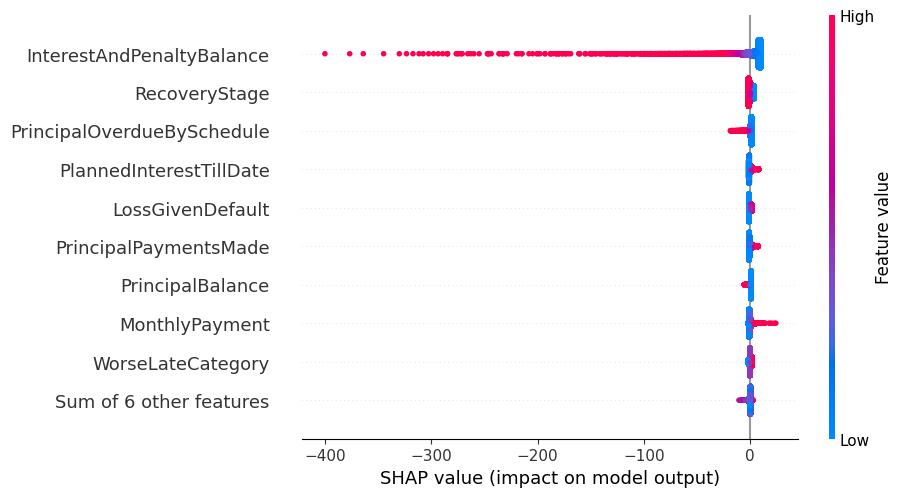

In [40]:
shap.plots.beeswarm(shap_values_lr)

### XGBoost

In [41]:
# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model, X_train)
shap_values = explainer(X_test)



 99%|===================| 23952/24293 [00:52<00:00]        

In [42]:
np.shape(shap_values.values)

(24293, 15)

In [43]:
import math
print(y_predict_xgb[:5])
probabilities = y_predict_proba_xgb[:5]
print(probabilities)
log_odds = []
for prob in probabilities:
    log_odd = math.log(prob/(1-prob))
    log_odds.append(log_odd)
print(log_odds)
print()


[0 1 0 1 0]
[8.6675260e-07 9.9999893e-01 8.4005233e-06 9.9999738e-01 1.6207565e-06]
[-13.95851138550684, 13.74515950265834, -11.687208161047904, 12.851340076912617, -13.332615917468328]



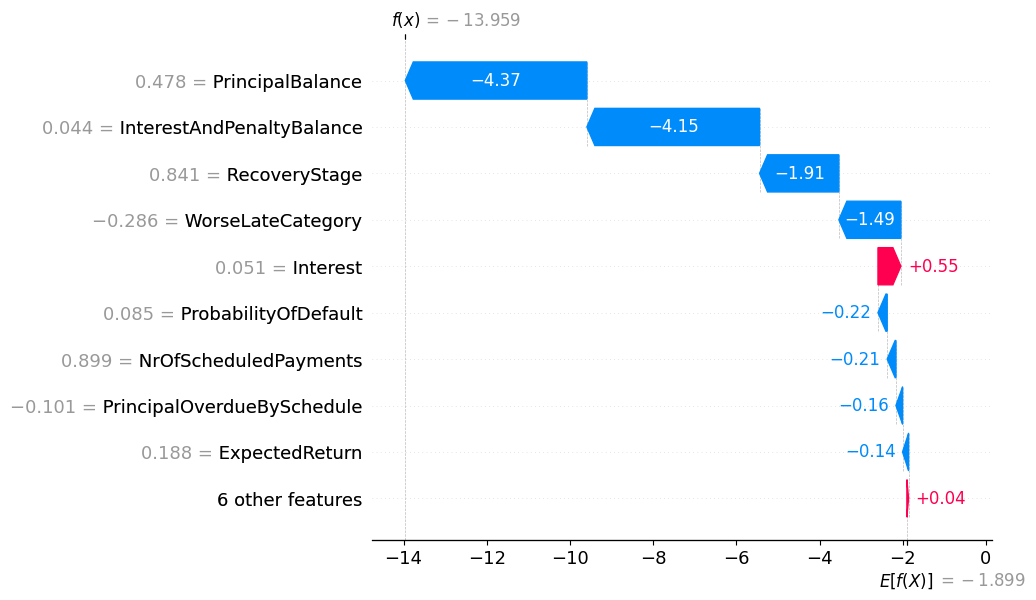

In [44]:
shap.plots.waterfall(shap_values[0])


In [45]:
shap.plots.force(shap_values[0])


In [46]:
shap.plots.force(shap_values[:10])


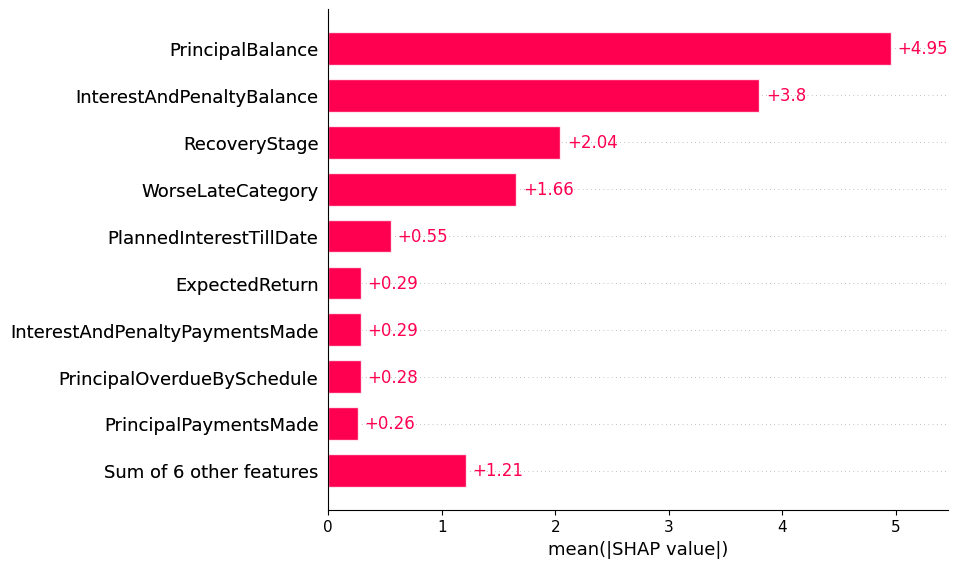

In [47]:
shap.plots.bar(shap_values)

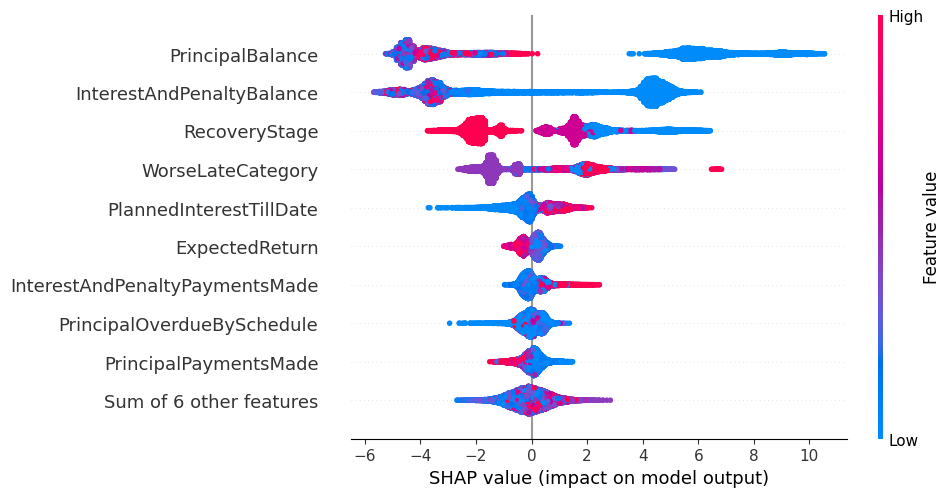

In [48]:
shap.plots.beeswarm(shap_values)

## LIME

In [49]:
import lime
import lime.lime_tabular

### Decision Tree

In [54]:
lime_explainer_dt = lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X_train.columns, verbose=True, mode='classification')
explanation_dt = lime_explainer_dt.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=dt_model.predict_proba,
    num_features=5
)

explanation_dt.show_in_notebook(show_table = True)

Intercept 0.8969900577803501
Prediction_local [0.06166437]
Right: 0.0


### Logistic regression

In [55]:
lime_explainer_lr = lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X_train.columns, verbose=True, mode='classification')
explanation_lr = lime_explainer_lr.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=lr_model.predict_proba,
    num_features=5
)

explanation_lr.show_in_notebook(show_table = True)

Intercept 0.8270113846939144
Prediction_local [-0.31303756]
Right: 1.3174146784113833e-05


### XGBoost

In [56]:
lime_explainer_xgb = lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X_train.columns, verbose=True, mode='classification')
explanation_xgb = lime_explainer_xgb.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=xgb_model.predict_proba,
    num_features=5
)

explanation_xgb.show_in_notebook(show_table = True)

Intercept 0.9181684201318248
Prediction_local [0.06809067]
Right: 8.667526e-07
